# Best Number Estimators Gradient Boosting

In [23]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns

# Data
from sklearn.datasets import make_moons, make_regression

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Dataset
df = sns.load_dataset('car_crashes')

In [5]:
# Correlations
df.corr().style.background_gradient(cmap='coolwarm')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


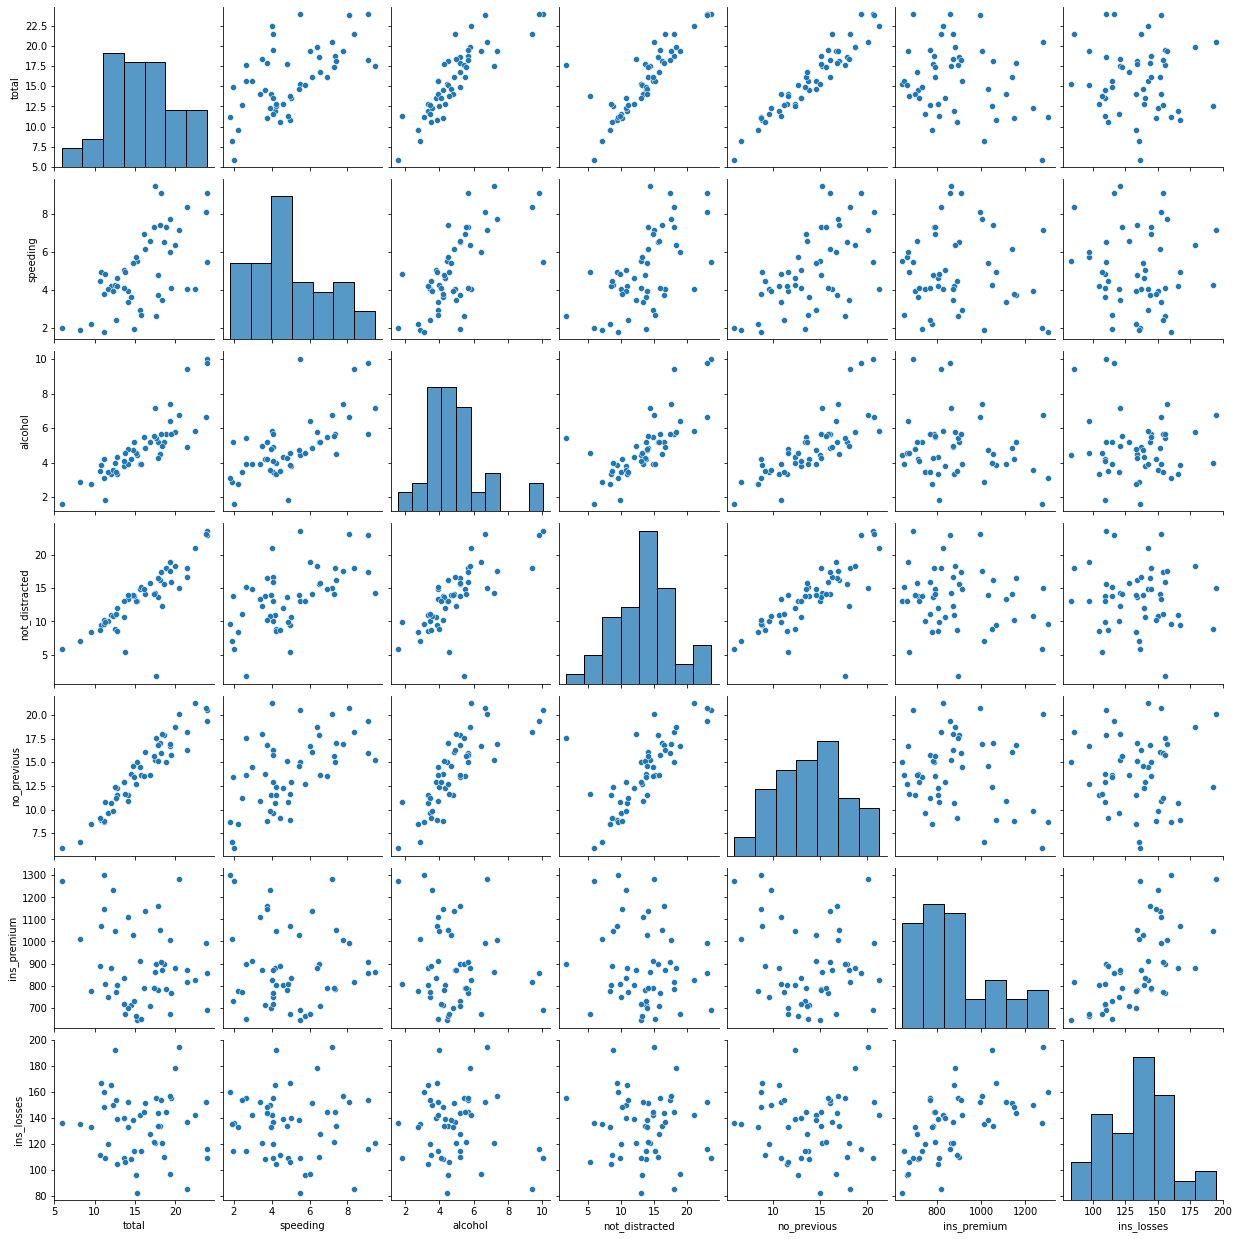

In [6]:
# Pairplot
sns.pairplot(df)

The correlations and pairplots show that the best features to be considered for regression are `speeding`, `alcohol`, `not_distracted` and `no_previous`.

In [7]:
# Missing
df.isnull().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [268]:
# X and y
X = df.drop(['ins_premium', 'ins_losses', 'abbrev', 'total'], axis=1)
y = df['total']

# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [269]:
steps = [
    ('scale', StandardScaler()),
    ('GBR', GradientBoostingRegressor(n_estimators=500, learning_rate=0.03))
]

# Instance Pipeline and fit
pipe = Pipeline(steps).fit(X_train, y_train)

In [270]:
# Predict
preds = pipe.predict(X_test)

In [271]:
# RMSE of the predictions
print(f'RMSE: { round(np.sqrt(mean_squared_error(y_test, preds)),1 )}')
# Data Y mean
print(f'Data y mean: {round( y.mean(),1 )}')

RMSE: 1.1
Data y mean: 15.8


### Best number of Estimators


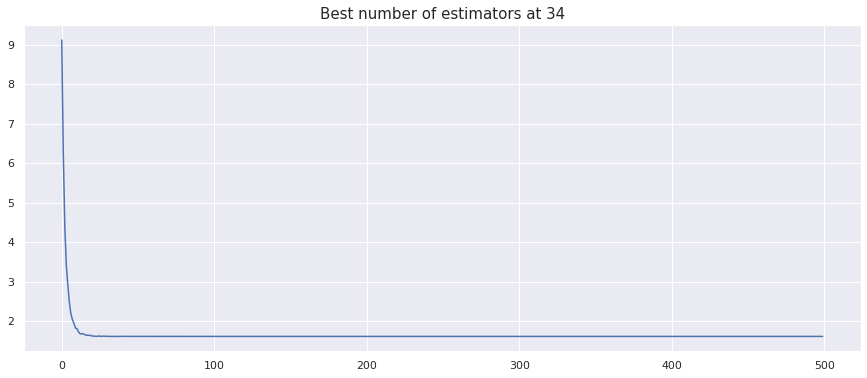

In [272]:
#Model
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3).fit(X_train, y_train)

# Loop for the best number
errors = [ mean_squared_error(y_test, preds)
for preds in gbr.staged_predict(X_test)]
best_n_estimators = np.argmin(errors) + 1

#Plot
sns.set(rc={'figure.figsize':(15,6)})
g=sns.lineplot(x=range(500), y=errors)
g.set_title(f'Best number of estimators at {best_n_estimators}', size=15);

In [273]:
gbr = GradientBoostingRegressor(n_estimators=34, learning_rate=0.3).fit(X_train, y_train)
preds2 = gbr.predict(X_test)

In [274]:
# RMSE of the predictions
print(f'RMSE: { round(np.sqrt(mean_squared_error(y_test, preds2)),1 )}')
# Data Y mean
print(f'Data y mean: {round( y.mean(),1 )}')

RMSE: 1.0
Data y mean: 15.8


In [260]:
pd.DataFrame({'y_true':y_test, 'prediction':preds, 'prediction_best_n':preds2})

,y_true,prediction,prediction_best_n
33,16.8,16.071031,16.055101
12,15.3,16.470207,16.543663
26,21.4,20.869910,21.190517
48,23.8,21.892092,22.051863
35,14.1,14.591442,14.314167
22,14.1,11.881820,11.880484
3,22.4,21.984754,22.245672
28,14.7,15.500395,15.206851
32,12.3,11.834665,11.809498
1,18.1,18.365996,18.239247
